## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo 3 - Redes Neurais Convolucionais (CNNs)</span>


### <span style="color:darkred">Avaliação (com soluções)</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---

### Questão 1)

Considere duas camadas independentes de redes neurais profundas:

A. Camada densa com 64 neurônios, cuja entrada é um vetor de 1024 dimensões;<br>
B. Camada convolucional com 64 neurônios (filtros) de tamanho 5x5, cuja entrada é uma matriz de 32x32 valores (1024 no total).

Qual o total de parâmetros a serem aprendidos em cada camada?

(a) A = 6560 parâmetros; B = 1664 parâmetros <br>
(b) A = 6560 parâmetros; B = 2880 parâmetros <br>
(c) A = 6560 parâmetros; B = 26624 parâmetros <br>
(d) <font color="red">A = 65600 parâmetros; B = 1664 parâmetros <br></font>
(e) A = 65600 parâmetros; B = 26624 parâmetros <br>

**Justificativa:** para a camada densa, com 64 neurônios e uma entrada de 1024 dimensões, cada neurônio terá 1024 pesos e 1 termo bias, resultando em $(1024 + 1) \times 64 = 65600$ parâmetros. Para a camada convolucional, com 64 filtros de tamanho 5x5, cada filtro terá $5 \times 5 = 25$ pesos e 1 bias, totalizando $(25 + 1) \times 64 = 1664$ parâmetros. Assim, a alternativa (d) é a correta. Ver código abaixo.


In [ ]:
# Camada densa
n_entradas = 1024
n_neuronios_densa = 64
parametros_densa = (n_entradas + 1) * n_neuronios_densa
print(f'Parâmetros na camada densa: {parametros_densa}')

# Camada convolucional
n_filtros = 64
tamanho_filtro = 5 * 5
parametros_convolucional = (tamanho_filtro + 1) * n_filtros
print(f'Parâmetros na camada convolucional: {parametros_convolucional}')

Parâmetros na camada densa: 65600
Parâmetros na camada convolucional: 1664


---
### Questão 2)

Considere o conceito de "campo receptivo local" como uma região de certo tamanho dos dados de entrada que é processada de forma a gerar a saída. Considere ainda dois tipos de unidades de processamento de redes neurais profundas:

A. Camada densa (tipo Perceptron), que recebe por entrada um vetor com 16384 dimensões<br>
B. Camada convolucional com filtro de tamanho 3x3 com padding, que recebe por entrada uma imagem com 128 x 128 dimensões.<br>
C. Sequência de duas camadas: a primeira convolucional com filtros de tamanho 5x5 sem padding, que recebe por entrada uma imagem com 128 x 128 dimensões, seguida de uma camada densa (tipo Perceptron), que recebe por entrada o vetor composto por todos os valores achatados (flatten) da camada convolucional anterior.

Qual é o tamanho do campo receptivo local nos dados de entrada, para cada valor de saída das camadas computado por A, B e C?

Em C a saída é referente à segunda camada, portanto considerar o processamento de ambas.

 <font color='red'>(a) A = 16384; B = 3 x 3; C = 128 x 128 </font><br>
 (b) A = 1; B = 3 x 3; C = 126 x 126<br>
 (c) A = 1;  B = 128 x 128; C = 128 x 128<br>
 (d) A = 16384; B = 5 x 5; C = 128 x 128<br>
 (e) A = 16384; B = 130 x 130; C = 126 x 126<br>


**Justificativa:** No caso (A), toda camada densa processa todos os elementos de entrada e portanto o campo receptivo é composto de todos os valores. De fato poderíamos até mesmo dizer que, na prática, é um campo receptivo global. Já uma camada convolucional (B), essa processa dados localmente sempre igual ao tamanho do filtro, nesse caso 3x3. No caso (C) o campo receptivo da camada convolucional é 5x5, porém todos os valores são posteriormente submetidos a uma camada densa, e para essa segunda camada todos os elementos da entrada estão sendo considerados (direta ou indiretamente). Assim, o campo receptivo termina sendo toda a imagem de entrada contendo 128x128 pixels.

---

### Questão 3)

Utilizando a biblioteca Keras, projete uma rede neural para processar dados unidimensionais (dimensionalidade do vetor de entrada = 256), e que contenha as seguintes camadas:

1. Camada max pooling 1D com tamanho de pool = 4
2. Camada convolucional 1D com 32 filtros de tamanho 5, com zero-padding
3. Camada max pooling 1D com tamanho de pool = 6
4. Camada convolucional 1D com 64 filtros de tamanho 3, sem padding
5. Camada global max pooling 1D

Essa arquitetura poderia ser utilizada para receber por entrada uma janela de uma série temporal contendo 256 instâncias e aprender um espaço de características compacto com a camada Global Max Pooling.

Quais as dimensionalidades das saídas das camadas 1 (primeiro MaxPooling), 4 (segunda Convolucional) e 5 (Global Max Pooling)?

(a) 1=(256,1); 4=(10,32); 5=(64)<br>
<font color='red'>(b) 1=(64,1); 4=(8,64); 5=(64)</font><br>
(c) 1=(63,32); 4=(8,32); 5=(32)<br>
<font color='red'>(d) 1=(64,1); 4=(8,64); 5=(64)</font><br>
(e) 1=(64,1); 4=(10,64); 5=(32)<br>

**Justificativa:** Ver código abaixo

In [ ]:
import tensorflow as tf
from tensorflow import keras

modelA = keras.Sequential()
modelA.add(keras.layers.MaxPooling1D(pool_size=4, input_shape=(256, 1)))
modelA.add(keras.layers.Conv1D(32, kernel_size=5, padding='same', activation='relu'))
modelA.add(keras.layers.MaxPooling1D(pool_size=6))
modelA.add(keras.layers.Conv1D(64, kernel_size=3, padding='valid', activation='relu'))
modelA.add(keras.layers.GlobalMaxPooling1D())
modelA.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling1d (MaxPooling1D)         │ (None, 64, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 64, 32)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 8, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,400 (25.00 KB)

 Trainable params: 6,400 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

---

### Questão 4)

Carregue a base de dados Fashion MNIST conforme o código abaixo. Normalize os dados das imagens para que os valores fiquem entre 0 e 1 e, em seguida, converta as classes para o formato categórico utilizando `tf.keras.utils.to_categorical`.

A seguir, crie uma CNN para classificar as imagens dessa base de dados, contendo as seguintes camadas:

1. Convolucional 1 com 32 filtros de tamanho $3 \times 3$, sem padding e stride 1 (nas duas direções)
2. MaxPooling com tamanho 2 e stride 2 nas duas direções
3. Convolucional 2 com 64 filtros de tamanho $3 \times 3$, com padding e stride $2,1$
4. Convolucional 3 com 64 filtros de tamanho $3 \times 3$, sem padding e stride $1,2$
5. Global Max Pooling
6. Camada densa com 128 neurônios
7. Camada de saída com ativação softmax

Após montar o modelo, realize a predição para o primeiro elemento do conjunto de treinamento no formato `model.predict(x_train[0:1])`.

Quais os tamanhos das saídas das camadas de 3 até 5, e qual foi a soma das probabilidades (de todas as classes) gerada como saída para a predição do primeiro elemento, arredondando essa soma para 4 casas decimais?

(a) 3=(13,7,32); 4=(6,12,64); 5=(64); soma=0.5<br>
<font color='red'>(b) 3=(13,7,64); 4=(6,5,64); 5=(64); soma=1.0<br></font>
(c) 3=(14,14,64); 4=(12,12,32); 5=(32); soma=0.5<br>
(d) 3=(14,7,64); 4=(7,7,64); 5=(64); soma=1.0<br>
(e) 3=(28,14,64); 4=(14,14,64); 5=(64); soma=1.0<br>

**Justificativa:** Ver código abaixo


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Carregar base de dados Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar imagens para intervalo entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Classes para categórico
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reformatação das imagens
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Criando o modelo
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(64, (3, 3), strides=(1,2), padding='same', activation='relu'),
    keras.layers.Conv2D(64, (3, 3), strides=(2,1), activation='relu'),
    keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Resumo do modelo
model.summary()

# Predição do primeiro elemento do conjunto de treinamento
predictions = model.predict(x_train[0:1])
mean_probability = round(np.sum(predictions),2)

print("Soma das probabilidades:", mean_probability)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 7, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 6, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_4               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Soma das probabilidades: 1.0


---

### Questão 5)

Carregue a base de dados CIFAR-10 conforme o código abaixo. Normalize os dados das imagens de forma a que os valores estejam entre 0 e 1, depois converta as classes para o tipo categórico utilizando o ` tf.keras.utils.to_categorical`.  Iremos usar um subconjunto de treinamento contendo as primeiras 5000 imagens (usar código abaixo)

A seguir, crie uma CNN para classificar imagens dessa base de dados, contendo como camadas:

1. convolucional 1 com 32 filtros de tamanho $3\times 3$, sem padding e stride 1 (nas duas direções)
2. maxpooling com tamanho 2 e stride 2,1
3. convolucional 2 com 32 filtros de tamanho $3\times 3$, sem padding e stride $1,1$
4. maxpooling com tamanho 2 e stride 1,2
5. global max pooling
6. camada densa com 28 neurônios
7. camada classificadora com ativação softmax

Todas as camadas convolucionais devem ter ativação relu.

Iremos repetir 5 vezes o experimento de treinamento e avaliação dessa rede, da seguinte forma: defina as sementes aleatórias do numpy para 1 e do tensorflow para 2. Depois, utilizando a arquitetura definida, configure a rede para treinar com a configuração abaixo.
* otimizador: SGD
* taxa de aprendizado: 0.015
* função de custo: `categorical_crossentropy`
* métrica: `accuracy`
* épocas: 30
* batchsize: 32

Após o processo de aprendizado, obtenha a acurácia calculada no conjunto de treinamento e no conjunto de testes utilizando a função `evaluate()`.

Com base na média da acurácia de treinamento e teste obtida das 5 execuções, escolha a opção cujo intervalo se enquadre nos valores obtidos. É um processo lento em CPU, mude seu runtime para GPU se estiver executando no colab.

(c) Acurácia Treinamento = [30,34],  Acurácia Teste = [25,30]<br>
(b) Acurácia Treinamento = [42,48],  Acurácia Teste = [28,32]<br>
<font color='red'>(c) Acurácia Treinamento = [42,48],  Acurácia Teste = [36,41]<br></font>
(d) Acurácia Treinamento = [42,48],  Acurácia Teste = [42,48]<br>
(a) Acurácia Treinamento = [50,55],  Acurácia Teste = [46,51]<br>

**Justificativa:** ver código abaixo

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
(50000, 32, 32, 3)
Classes:  10


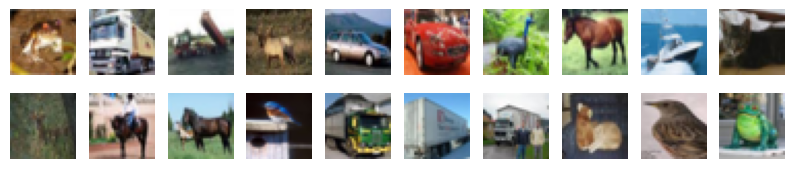

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis('off')

img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# verifica se as imagens da base de dados tem um canal (i.e. em tons de cinza)
# ou mais do que um canal e se houver mais do que um canal entao armazena a
# quantidade de canais
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formatando as imagens de forma que sejam transformadas em
# matrizes com canais (por exemplo quando as imagens sao RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

## subconjunto
x_train_sub = x_train[:5000]
y_train_sub = y_train[:5000]

del x_train, y_train

In [ ]:
from numpy.random import seed
from tensorflow.random import set_seed

def my_cnn(show_summary=False):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(img_lin, img_col,3)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,1)))
    model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,2)))
    model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(keras.layers.GlobalMaxPooling2D())
    model.add(keras.layers.Dense(20))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    if show_summary: model.summary()
    return model

In [ ]:
my_cnn(show_summary=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 27, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,262 (79.15 KB)

 Trainable params: 20,262 (79.15 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential, built=True>

In [ ]:
# exemplo de como realizar o treinamento
for i in range(1,6):
    # sementes
    seed(1)
    set_seed(2)
    # criar modelo
    # compilar modelo
    # treinar modelo
    # avaliar modelo

In [ ]:
batch_size = 32
epochs = 30

acc_train = []
acc_test = []

for i in range(1,6):
    seed(1)
    set_seed(2)
    print(f'Training Model {i}...')
    model = my_cnn()
    model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.015),
              metrics=['accuracy'])

    model.fit(x_train_sub, y_train_sub,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

    scoreTr = model.evaluate(x_train_sub, y_train_sub, verbose = 0)
    scoreTe = model.evaluate(x_test, y_test, verbose = 0)

    acc_train.append(scoreTr[1])
    acc_test.append(scoreTe[1])
    print(f'\tAccuracy: Train {scoreTr[1]*100:.1f}% / Test {scoreTe[1]*100:.1f}%')

Training Model 1...
	Accuracy: Train 43.2% / Test 38.4%
Training Model 2...
	Accuracy: Train 42.1% / Test 37.7%
Training Model 3...
	Accuracy: Train 44.6% / Test 38.8%
Training Model 4...
	Accuracy: Train 42.5% / Test 37.1%
Training Model 5...
	Accuracy: Train 43.0% / Test 38.8%


In [ ]:
print(f"Acurácia média treinamento: {(np.mean(acc_train)*100):.1f}%")
print(f"Acurácia média teste: {(np.mean(acc_test)*100):.1f}%")

Acurácia média treinamento: 43.1%
Acurácia média teste: 38.2%


In [ ]:
Acurácia média treinamento: 44.0%
Acurácia média teste: 38.7%